<a href="https://colab.research.google.com/github/AbdullahMastan01/FoodVision/blob/main/Food002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Food002

> This is a **Binary Image Classification** Project that involves classifiying images of *Pizza* and *Steak*

## Work Flow

1. Import the Source Data
2. Inspect the Data
3. Preprocess the data
4. Build the Tiny VGG model
5. Evaluate it
6. Make Predictions on Custom Data
7. Post it on LinkedIn

### 1. Importing the Data

1. Import two classes from the Food101 dataset


In [1]:
# Upload the file onto Colab
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-08-25 14:16:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   238MB/s    in 0.4s    

2023-08-25 14:16:19 (238 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



The file needs to be unziped before use!

In [2]:
# Unzipping

import zipfile

# Path of the Colab File

FILE_PATH = "/content/pizza_steak.zip"
file_unziped = zipfile.ZipFile(FILE_PATH)
file_unziped.extractall()
file_unziped.close()

### 2. Inspecting the Data

* Check the no of source images
* Check the shape of Random images
* Plot Random Images and corrosponding Labels.

In [3]:
# Check the dirs and their respective files
import os

# Path of the Image Dir
IMAGE_DIR_PATH = "/content/pizza_steak"

for ROOT_DIR, SUB_DIRS, FILE_NAMES in os.walk(IMAGE_DIR_PATH):
  print(f'{ROOT_DIR}, has {len(SUB_DIRS)} directories, {SUB_DIRS}, which has {len(FILE_NAMES)} images')

/content/pizza_steak, has 2 directories, ['train', 'test'], which has 0 images
/content/pizza_steak/train, has 2 directories, ['steak', 'pizza'], which has 0 images
/content/pizza_steak/train/steak, has 0 directories, [], which has 750 images
/content/pizza_steak/train/pizza, has 0 directories, [], which has 750 images
/content/pizza_steak/test, has 2 directories, ['steak', 'pizza'], which has 0 images
/content/pizza_steak/test/steak, has 0 directories, [], which has 250 images
/content/pizza_steak/test/pizza, has 0 directories, [], which has 250 images


Basically there are **250 Test** and **750 Train** Imges

In [4]:
# Fetch the images from the Dir!

import pathlib
import numpy as np

# Make a path object for the test and train dirs
PATH_TRAIN = pathlib.Path("/content/pizza_steak/train")
PATH_TEST = pathlib.Path("/content/pizza_steak/test")

class_names = sorted(np.array([item.name for item in PATH_TRAIN.glob("*")]))
class_names

['pizza', 'steak']

*Class1:* `PIZZA`


*Class2:* `STEAK`

In [5]:
# Display the Images along with its corrosponding shape and label

import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def random_image_visulization(TARGET_DIR, TARGET_CLASS):
  '''
  This function returns a random image form the TARGET_CLASS along with its Shape and Label
  '''
  # Concat the target Dir
  PATH_DIR = TARGET_DIR + TARGET_CLASS

  # Select a random image from the TARGET_DIR
  random_image_name = random.sample(os.listdir(PATH_DIR), 1)

  # Read the Image
  random_image = mpimg.imread(PATH_DIR + '/' + random_image_name[0])

  # Plot the image and its sample
  TITLE = TARGET_CLASS
  plt.title(TITLE)

  plt.imshow(random_image)
  plt.axis(False)

  print(f"Shape: {random_image.shape}")



Shape: (384, 512, 3)


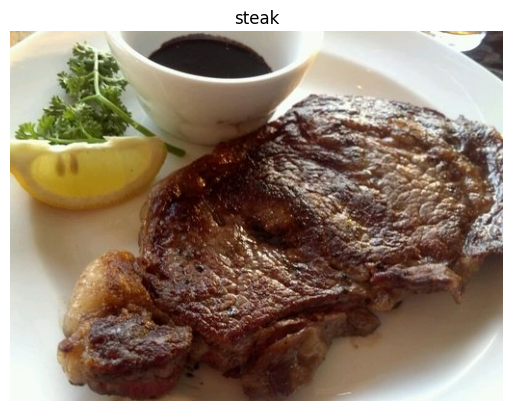

In [6]:
# Call the function
TARGET_DIR = "/content/pizza_steak/test/"
TARGET_CLASS = class_names[1]
random_image_visulization(TARGET_DIR, TARGET_CLASS)

### 3. Preprocessing the Data

* Normalize the Data
* Augment the Data

In [7]:
# Data Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create Train and Valid Generators

dataGen_train = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,)

dataGen_valid = ImageDataGenerator(rescale=1/255.)

# Apply the generator onto the images
# These are the paths --> PATH_TRAIN, PATH_TEST

X_train = dataGen_train.flow_from_directory(PATH_TRAIN,
                                            target_size=(224,224),
                                            class_mode='binary')

X_valid = dataGen_valid.flow_from_directory(PATH_TEST,
                                            target_size=(224,224),
                                            class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 4. Building The Model

In [8]:
### 4. Build the Tiny VGG Model!

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


model_1 = Sequential([
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

hist_1 = model_1.fit(X_train,
                     epochs=5,
                     steps_per_epoch=len(X_train),
                     validation_data=X_valid,
                     validation_steps=len(X_valid))

Epoch 1/5
47/47 [==============================] - 34s 509ms/step - loss: 0.6161 - accuracy: 0.6513 - val_loss: 0.4362 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.5394 - accuracy: 0.7420 - val_loss: 0.4399 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4924 - accuracy: 0.7760 - val_loss: 0.3530 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4805 - accuracy: 0.7847 - val_loss: 0.3546 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 20s 425ms/step - loss: 0.4619 - accuracy: 0.7853 - val_loss: 0.3348 - val_accuracy: 0.8560


### 5. Evaluation

In [9]:
# Function to plot the Val_Loss and Val_Accuracy
import pandas as pd

def plot_historyCurves(history):
  """
  Plots the Validation Loss and Accuracy along with the Training Params
  """

  # The training metrics
  accuracy = history.history['accuracy']
  loss = history.history['loss']

  # The validation Metrics
  val_accuracy = history.history['val_accuracy']
  val_loss = history.history['val_loss']

  # Epochs
  epochs = range(len(loss))

  # Plot the Curves
  plt.title("Train Loss vs Valid Loss")
  plt.plot(epochs, loss, label = "Train Loss")
  plt.plot(epochs,val_loss, label = "Valid Loss")

  plt.figure()
  plt.title("Train Accuracy vs Valid Accuracy")
  plt.plot(epochs, accuracy, label = "Train Accuracy")
  plt.plot(epochs, val_accuracy, label = "Test Accuracy")

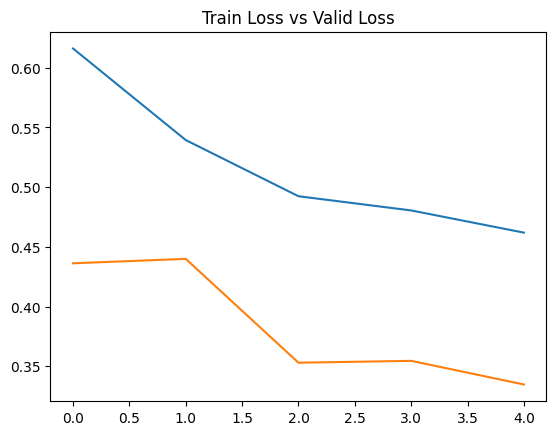

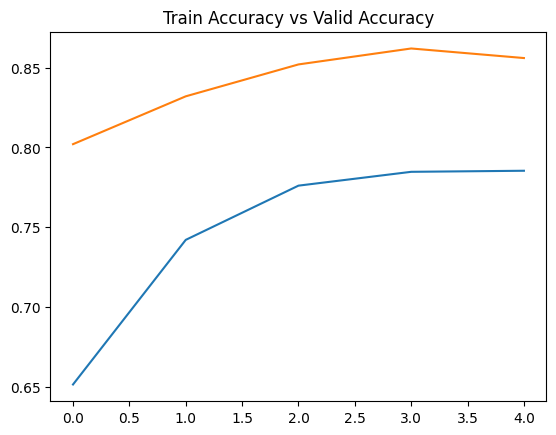

In [10]:
plot_historyCurves(hist_1)

### 6. Predicting on Custom Data

* Preprocss the Data
* Make a Prediction
* Plot the Prediction

In [26]:
# Preprocess the Data

import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def customData_preprocess(FILE_NAME, IMAGE_SIZE):
  """
  Function that reads an Image, turns it into a tensor, reshapes, normalizes it, and expands the tensor
  over the 0th dimension!
  """

  # Read the Image
  image = tf.io.read_file(FILE_NAME)

  # Convert image into Tensor
  image = tf.image.decode_image(image)

  # Reshape the Image
  image = tf.image.resize(image, size = (IMAGE_SIZE,IMAGE_SIZE))

  # Normalize the Image
  image = image/255.

  return tf.expand_dims(image, axis=0)

In [45]:
# Function to predict the class of an Image and Plot it
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

def predict_plot(FILE_NAME, IMAGE_SIZE, model, class_names):
  """
  This function Predicts the Class of an Image and Plots it(along with the Predicted Class Name)
  """

  # Preprocess the Data
  image = customData_preprocess(FILE_NAME, IMAGE_SIZE)

  # Make Predictions
  prediction_prob = model.predict(image)

  # Convert Probs into human interpretable Classes
  index = int(tf.round(prediction_prob))

  # Plot the Image
  TITLE = "Prediction: " + class_names[index]
  plt.title(TITLE)
  # Matplot img converion
  mp_image = mpimg.imread(FILE_NAME)
  plt.imshow(mp_image)
  plt.axis(False)

In [58]:
# Get the Link of an Image
!wget https://img.freepik.com/free-photo/side-view-steak-with-grilled-vegetables-with-sauce-glass-red-wine_141793-5111.jpg?size=626&ext=jpg&ga=GA1.1.915320752.1692972933&semt=sph

--2023-08-25 14:44:02--  https://img.freepik.com/free-photo/side-view-steak-with-grilled-vegetables-with-sauce-glass-red-wine_141793-5111.jpg?size=626
Resolving img.freepik.com (img.freepik.com)... 23.39.149.94, 2600:1407:f800:48b::312e, 2600:1407:f800:4a8::312e
Connecting to img.freepik.com (img.freepik.com)|23.39.149.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81090 (79K) [image/jpeg]
Saving to: ‘side-view-steak-with-grilled-vegetables-with-sauce-glass-red-wine_141793-5111.jpg?size=626’

side-view-steak-wit 100%[===================>]  79.19K  --.-KB/s    in 0.05s   

2023-08-25 14:44:02 (1.51 MB/s) - ‘side-view-steak-with-grilled-vegetables-with-sauce-glass-red-wine_141793-5111.jpg?size=626’ saved [81090/81090]



1/1 [==============================] - 0s 18ms/step


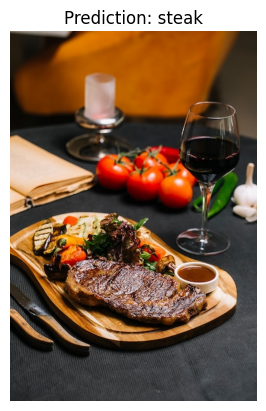

In [59]:
PATH_IMAGE = "/content/side-view-steak-with-grilled-vegetables-with-sauce-glass-red-wine_141793-5111.jpg?size=626"
IMAGE_SIZE = 224
predict_plot(PATH_IMAGE, IMAGE_SIZE, model_1, class_names )